# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/electricity_transformer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/electricity_transformer.parquet')

In [5]:
y_train = train.OT_next
X_train = train.drop(columns=['date', 'OT_next'])

In [6]:
y_validation = validation.OT_next
X_validation = validation.drop(columns=['date', 'OT_next'])

In [7]:
exploratory_depths = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60]

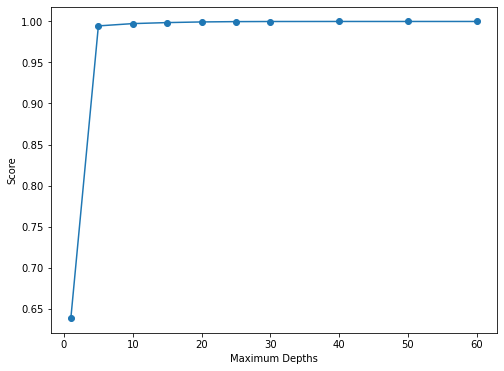

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(exploratory_depths, [DecisionTreeRegressor(max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], marker= 'o')
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.show()

In [12]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

In [13]:
models_list = [DecisionTreeRegressor(max_depth = i) for i in max_depth]
names_list = ['DT_'+str(i) for i in max_depth]

In [14]:
metrics = regression(models_list, names_list, '../../../data/metrics/electricity_transformer/decision_tree.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
DT_1,0.456025,5.021950,8.084298,60.979263
DT_2,0.802676,2.560617,4.809058,87.808529
DT_3,1.076480,1.467366,2.753368,87.640145
DT_4,1.385801,0.892085,1.483666,66.314353
DT_5,2.177032,0.614569,0.849611,38.244995
DT_6,2.134522,0.520476,0.529695,1.771190
DT_7,2.588705,0.486840,0.382148,-21.504305
DT_8,3.603271,0.465830,0.450532,-3.283995
DT_9,3.400492,0.445505,0.498326,11.856465
DT_10,4.109414,0.426239,0.504353,18.326362


**DT_7** is the best model in validation, then we are left with it.

In [15]:
test =  pd.read_parquet('../../../data/model_input/test_sets/electricity_transformer.parquet')

In [16]:
y_test = test.OT_next
X_test = test.drop(columns=['date', 'OT_next'])

In [17]:
retrain = pd.concat([train, validation])

In [18]:
y_retrain = retrain.OT_next
X_retrain = retrain.drop(columns=['date', 'OT_next'])

In [27]:
model = DecisionTreeRegressor(max_depth=7).fit(X_retrain, y_retrain)

In [28]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 0.3415


Results improved in the test after retraining

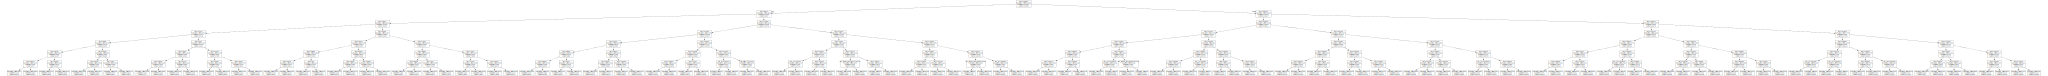

In [29]:
finaltree = export_graphviz(model, out_file=None, 
                                feature_names=X_retrain.columns,
                                proportion=True)

finalgraph = graphviz.Source(finaltree, format="pdf")
finalgraph.render(filename='best_decision_tree')
finalgraph

In [30]:
dump(model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']

In [31]:
with open('../../../data/metrics/electricity_transformer/final_RMSE.txt', 'a') as f:
    f.write('\nDT, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_10684/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


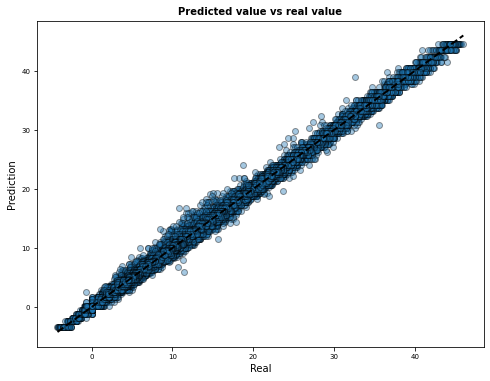

In [32]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)